In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import re
import csv
import os
import glob
import zipfile
import matplotlib.pyplot as plt

In [ ]:
prefix = '/content/drive/MyDrive/12 Lead ECG Database/'
file_path = prefix + 'Diagnostics.xlsx'

In [ ]:
#read diagnostic features
diagnostic_features = pd.read_excel(file_path, engine = 'openpyxl')

In [ ]:
diagnostic_features

In [ ]:
#convert pandas to numpy array
diagnostic_features_ar = np.asarray(diagnostic_features)

In [ ]:
diagnostic_features_ar

array([['MUSE_20180113_171327_27000', 'AFIB', 'RBBB TWC', ..., 208, 265,
        386],
       ['MUSE_20180112_073319_29000', 'SB', 'TWC', ..., 215, 261, 431],
       ['MUSE_20180111_165520_97000', 'SA', 'NONE', ..., 224, 265, 415],
       ...,
       ['MUSE_20181222_204310_31000', 'SVT', 'NONE', ..., 208, 284, 378],
       ['MUSE_20181222_204312_58000', 'SVT', 'NONE', ..., 205, 269, 360],
       ['MUSE_20181222_204314_78000', 'SVT', 'NONE', ..., 208, 278, 364]],
      dtype=object)

In [ ]:
# set column 4 to 16 as input features
X = diagnostic_features_ar[:, 3:15]

In [ ]:
X[:5]

array([[85, 'MALE', 117, 234, 114, 356, 496, 81, -27, 19, 208, 265],
       [59, 'FEMALE', 52, 52, 92, 432, 401, 76, 42, 8, 215, 261],
       [20, 'FEMALE', 67, 67, 82, 382, 403, 88, 20, 11, 224, 265],
       [66, 'MALE', 53, 53, 96, 456, 427, 34, 3, 9, 219, 267],
       [73, 'FEMALE', 162, 162, 114, 252, 413, 68, -40, 26, 228, 285]],
      dtype=object)

In [ ]:
# set column 2(Rhythm) as labels
labels = diagnostic_features_ar[:, 1]

In [ ]:
labels[:100]

array(['AFIB', 'SB', 'SA', 'SB', 'AF', 'SB', 'AFIB', 'SR', 'SB', 'SB',
       'SB', 'ST', 'SB', 'SB', 'SB', 'AFIB', 'SB', 'SB', 'SB', 'SB', 'SR',
       'SB', 'AFIB', 'ST', 'SB', 'SB', 'SB', 'SA', 'AF', 'AFIB', 'SB',
       'ST', 'SB', 'AFIB', 'SA', 'AFIB', 'SB', 'AFIB', 'SB', 'AFIB', 'ST',
       'SR', 'AFIB', 'SB', 'ST', 'AFIB', 'SR', 'AFIB', 'SB', 'AFIB', 'SR',
       'AF', 'SB', 'SB', 'SB', 'SB', 'ST', 'SR', 'ST', 'AFIB', 'SR', 'SB',
       'SR', 'AFIB', 'SB', 'SB', 'AFIB', 'SR', 'AF', 'SR', 'AFIB', 'SR',
       'SB', 'AFIB', 'SB', 'SR', 'SB', 'AFIB', 'SB', 'AFIB', 'AF', 'SB',
       'SB', 'SB', 'AFIB', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'AFIB',
       'SB', 'ST', 'SB', 'ST', 'SR', 'SA', 'SB', 'SB'], dtype=object)

In [ ]:
# get names and count of unique labels(Rhythm)
u, c = np.unique(labels, return_counts=True)
print(u)
print(c)

['AF' 'AFIB' 'AT' 'AVNRT' 'AVRT' 'SA' 'SAAWR' 'SB' 'SR' 'ST' 'SVT']
[ 445 1780  121   16    8  399    7 3889 1826 1568  587]


In [ ]:
c[7]/np.sum(c)

0.36530152169829044

[1780. 3889.  399.  445. 1826. 1568.  587.  121.   16.    7.    8.]


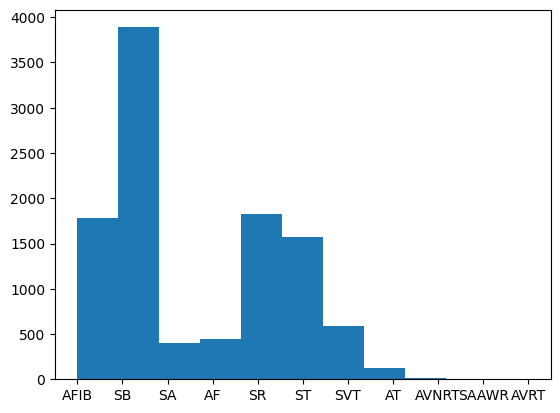

In [ ]:
#histogram of labels
print(plt.hist(labels, 11)[0])

In [ ]:
# encode gender to one hot 0 ,1
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X[:, 1] = label_encoder.fit_transform(X[:, 1])

In [ ]:
# encode labels in mumeric form
y = label_encoder.fit_transform(labels)

(array([ 183.,  251.,  580.,  675., 1269., 2110., 2360., 1863., 1119.,
         236.]),
 array([ 4. , 13.4, 22.8, 32.2, 41.6, 51. , 60.4, 69.8, 79.2, 88.6, 98. ]),
 <BarContainer object of 10 artists>)

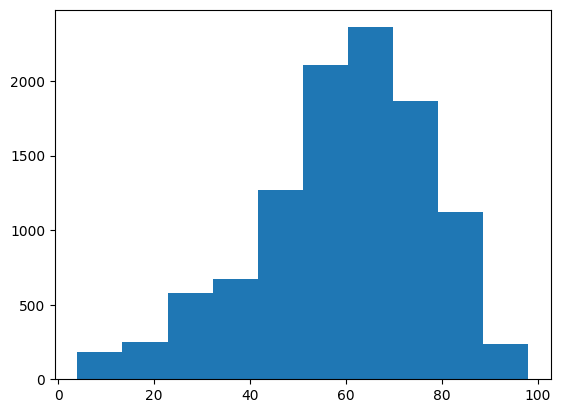

In [ ]:
# histogram of ages
import matplotlib.pyplot as plt
plt.hist(X[:,0])

(array([1780., 3889.,  399.,  445., 1826., 1568.,  587.,  121.,   16.,
           7.,    8.]),
 array([ 0.        ,  0.90909091,  1.81818182,  2.72727273,  3.63636364,
         4.54545455,  5.45454545,  6.36363636,  7.27272727,  8.18181818,
         9.09090909, 10.        ]),
 <BarContainer object of 11 artists>)

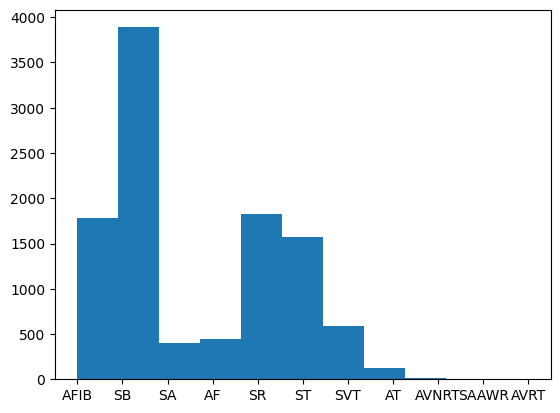

In [ ]:
import matplotlib.pyplot as plt
plt.hist(labels, 11)

In [ ]:
# convert age values to age range(0, 1, 2)
for i in range(X[:, 0].shape[0]):
    if X[i, 0] <= 55:
        X[i, 0] = 0
    elif X[i, 0] > 55 and X[i, 0] <=70:
        X[i,0] = 1
    else:
        X[i,0] = 2

(array([4057.,    0.,    0.,    0.,    0., 3607.,    0.,    0.,    0.,
        2982.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

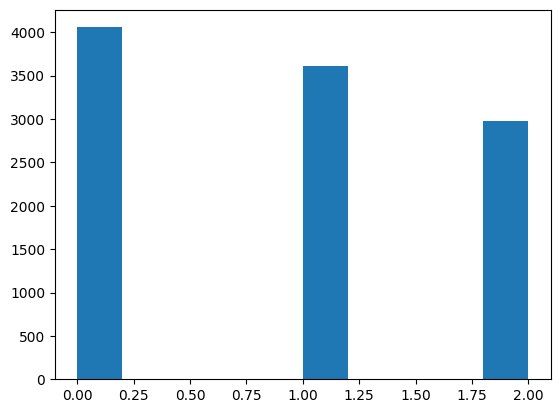

In [ ]:
#histogram of age range
import matplotlib.pyplot as plt
plt.hist(X[:,0])

In [ ]:
labels

array(['AFIB', 'SB', 'SA', ..., 'SVT', 'SVT', 'SVT'], dtype=object)

In [ ]:
y

array([ 1,  7,  5, ..., 10, 10, 10])

In [ ]:
u, c = np.unique(y, return_counts=True)
print(u)
print(c)

[ 0  1  2  3  4  5  6  7  8  9 10]
[ 445 1780  121   16    8  399    7 3889 1826 1568  587]


In [ ]:
X.shape

(10646, 12)

In [ ]:
y.shape

(10646,)

In [ ]:
# convert 7 labels to two values(0,1)
# SB(Sinus Bradycardia) is 1, others are 0.


for i in range(y.shape[0]):
    if y[i] != 7:
        y[i] = 0
    else:
        y[i] = 1



In [ ]:
# group labels into 4 classes
for i in range(y.shape[0]):
    if y[i] in (0,1):
        y[i] = 0
    elif y[i] in (2,3,4,6,9,10):
        y[i] = 1
    elif y[i] in (5,8):
        y[i] = 2
    else:
        y[i] = 3

In [ ]:
# get unique labels and count after grouping into classes
u, c = np.unique(y, return_counts=True)
print(u)
print(c)

[0 1]
[6757 3889]


In [ ]:
X

array([[2, 1, 117, ..., 19, 208, 265],
       [1, 0, 52, ..., 8, 215, 261],
       [0, 0, 67, ..., 11, 224, 265],
       ...,
       [0, 1, 152, ..., 25, 208, 284],
       [2, 1, 175, ..., 29, 205, 269],
       [2, 1, 117, ..., 19, 208, 278]], dtype=object)

In [ ]:
def get_data(path):
  diagnostic_features = pd.read_excel(path, engine = 'openpyxl')
  diagnostic_features_ar = np.asarray(diagnostic_features)
  X = diagnostic_features_ar[:, 3:15]
  labels = diagnostic_features_ar[:, 1]
  return X, labels

In [ ]:
def encode_data(input):
  label_encoder = LabelEncoder()
  transormed_input = label_encoder.fit_transform(input)
  return transormed_input


In [ ]:
def encode_labels(labels):
  label_encoder = LabelEncoder()
  labels = encode_data(labels)

  for i in range(labels.shape[0]):
    if labels[i] in (0,1):
        labels[i] = 0
    elif labels[i] in (2,3,4,6,9,10):
        labels[i] = 1
    elif labels[i] in (5,8):
        labels[i] = 2
    else:
        labels[i] = 3

  return labels




In [ ]:
def encode_age(age):
  for i in range(age.shape[0]):
    if age[i] <= 55:
        age[i] = 0
    elif age[i] > 55 and age[i] <=70:
        age[i] = 1
    else:
       age[i] = 2

  return age


In [ ]:
X[:, 0]

array([2, 1, 0, ..., 0, 2, 2], dtype=object)

In [ ]:
labels

array([ 0,  7,  5, ..., 10, 10, 10])

In [ ]:
X[:,0] = encode_age(X[:,0])

In [ ]:
# evaluate multinomial logistic regression model
from numpy import mean
from numpy import std
from sklearn import metrics
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, f1_score, auc
# define dataset

#get_data
prefix = '/content/drive/MyDrive/12 Lead ECG Database/'
file_path = prefix + 'Diagnostics.xlsx'
X, labels = get_data(file_path)

#encode_labels()
label_encoder = LabelEncoder()
X[:, 1] = encode_data(X[:, 1])
X[:,0] = encode_age(X[:,0])
labels = encode_labels(labels)
y = labels


norm1 = MinMaxScaler()
norm2 = StandardScaler()

X[:,2:] = norm2.fit_transform(X[:,2:])

#X[:,2:] = preprocessing.normalize(X[:,2:], norm='l2')

#for i in range(2, X.shape[1]):
  #X[:,i] = preprocessing.normalize(X[:,i], norm='l2')
   #X[:,i] = norm2.fit_transform(X[:, i].reshape(-1,1)).squeeze()
   #X[:,i] = norm1.fit_transform(X[:, i].reshape(-1,1)).squeeze()

# define the model evaluation procedure

# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter = 1000)
#model = LogisticRegression()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
#n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
cv_scores = cross_validate(model, X, y, scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted','roc_auc_ovr_weighted'], cv=cv, n_jobs=-1)
# report the model performance
print('Mean accuracy: %.3f (%.3f)' % (mean(cv_scores['test_accuracy']), std(cv_scores['test_accuracy'])))
print('Mean weighted precision: %.3f (%.3f)' % (mean(cv_scores['test_precision_weighted']), std(cv_scores['test_precision_weighted'])))
print('Mean weighted recall: %.3f (%.3f)' % (mean(cv_scores['test_recall_weighted']), std(cv_scores['test_recall_weighted'])))
print('Mean weighted f1: %.3f (%.3f)' % (mean(cv_scores['test_f1_weighted']), std(cv_scores['test_f1_weighted'])))
print('Mean weighted roc_auc_ovr: %.3f (%.3f)' % (mean(cv_scores['test_roc_auc_ovr_weighted']), std(cv_scores['test_roc_auc_ovr_weighted'])))

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=0)
clf = model.fit(trainX, trainy)

predict = model.predict(testX)

conf_mat = confusion_matrix(testy, predict)

print(conf_mat)

print(metrics.classification_report(testy, predict, digits=3))

#ROC AUC curve

# Generate class membership probabilities
y_preb_probs = clf.predict_proba(testX)

print('ROC AUC score %.3f'% (roc_auc_score(testy, y_preb_probs, average="weighted", multi_class="ovr")))

Mean accuracy: 0.823 (0.009)
Mean weighted precision: 0.817 (0.009)
Mean weighted recall: 0.823 (0.009)
Mean weighted f1: 0.819 (0.009)
Mean weighted roc_auc_ovr: 0.958 (0.004)
[[ 391  149  107   31]
 [ 146  531    6    2]
 [  73   30  511   39]
 [   6    1    3 1168]]
              precision    recall  f1-score   support

           0      0.635     0.577     0.604       678
           1      0.747     0.775     0.761       685
           2      0.815     0.783     0.798       653
           3      0.942     0.992     0.966      1178

    accuracy                          0.814      3194
   macro avg      0.785     0.781     0.782      3194
weighted avg      0.809     0.814     0.811      3194

ROC AUC score 0.954


In [ ]:
mean(cv_scores['test_precision_weighted'])

0.8172623591782955

In [ ]:
#to find the names of the possible scoring options that could be passed to the cross_validate and cross_val_scores functions
import sklearn
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [ ]:
# evaluate random forest classifier model
from numpy import mean
from numpy import std
from sklearn import metrics
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, f1_score, auc
from sklearn.ensemble import RandomForestClassifier

#get_data
prefix = '/content/drive/MyDrive/12 Lead ECG Database/'
file_path = prefix + 'Diagnostics.xlsx'
X, labels = get_data(file_path)

#encode_labels()
label_encoder = LabelEncoder()
X[:, 1] = encode_data(X[:, 1])
X[:,0] = encode_age(X[:,0])
labels = encode_labels(labels)
y = labels

norm1 = MinMaxScaler()
norm2 = StandardScaler()

#for i in range(2, X.shape[1]):
    #X[:,i] = norm2.fit_transform(X[:, i].reshape(-1,1)).squeeze()
   # X[:,i] = norm1.fit_transform(X[:, i].reshape(-1,1)).squeeze()


# define the multinomial logistic regression model
model = RandomForestClassifier(max_depth=100, random_state=0)

# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
# evaluate the model and collect the scores
#n_scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1)
cv_scores = cross_validate(model, X, y, scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted','roc_auc_ovr_weighted'], cv=cv, n_jobs=-1)
# report the model performance
print('Mean accuracy: %.3f (%.3f)' % (mean(cv_scores['test_accuracy']), std(cv_scores['test_accuracy'])))
print('Mean weighted precision: %.3f (%.3f)' % (mean(cv_scores['test_precision_weighted']), std(cv_scores['test_precision_weighted'])))
print('Mean weighted recall: %.3f (%.3f)' % (mean(cv_scores['test_recall_weighted']), std(cv_scores['test_recall_weighted'])))
print('Mean weighted f1: %.3f (%.3f)' % (mean(cv_scores['test_f1_weighted']), std(cv_scores['test_f1_weighted'])))
print('Mean weighted roc_auc_ovr: %.3f (%.3f)' % (mean(cv_scores['test_roc_auc_ovr_weighted']), std(cv_scores['test_roc_auc_ovr_weighted'])))

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=0)
clf = model.fit(trainX, trainy)

predict = model.predict(testX)

conf_mat = confusion_matrix(testy, predict)

print(conf_mat)

print(metrics.classification_report(testy, predict, digits=3))

#ROC AUC curve

# Generate class membership probabilities
y_preb_probs = clf.predict_proba(testX)

print('ROC AUC score %.3f'% (roc_auc_score(testy, y_preb_probs, average="weighted", multi_class="ovr")))

Mean accuracy: 0.914 (0.008)
Mean weighted precision: 0.913 (0.009)
Mean weighted recall: 0.914 (0.008)
Mean weighted f1: 0.913 (0.008)
Mean weighted roc_auc_ovr: 0.985 (0.003)
[[ 517   79   66   16]
 [  71  602   10    2]
 [  32    1  614    6]
 [   8    0    4 1166]]
              precision    recall  f1-score   support

           0      0.823     0.763     0.792       678
           1      0.883     0.879     0.881       685
           2      0.885     0.940     0.912       653
           3      0.980     0.990     0.985      1178

    accuracy                          0.908      3194
   macro avg      0.893     0.893     0.892      3194
weighted avg      0.906     0.908     0.907      3194

ROC AUC score 0.983


In [ ]:
cv_scores

In [ ]:
# evaluate svm classifier model
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

#rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1)
#poly = svm.SVC(kernel='poly', degree=3, C=1)

#get_data
prefix = '/content/drive/MyDrive/12 Lead ECG Database/'
file_path = prefix + 'Diagnostics.xlsx'
X, labels = get_data(file_path)

#encode_labels()
label_encoder = LabelEncoder()
X[:, 1] = encode_data(X[:, 1])
X[:,0] = encode_age(X[:,0])
labels = encode_labels(labels)
y = labels

norm1 = MinMaxScaler()
norm2 = StandardScaler()

#for i in range(2, X.shape[1]):
   # X[:,i] = norm2.fit_transform(X[:, i].reshape(-1,1)).squeeze()
   # X[:,i] = norm1.fit_transform(X[:, i].reshape(-1,1)).squeeze()

# define the multinomial logistic regression model
model = svm.SVC(probability = True)

# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
# evaluate the model and collect the scores
#n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
cv_scores = cross_validate(model, X, y, scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted','roc_auc_ovr_weighted'], cv=cv, n_jobs=-1)
# report the model performance
print('Mean accuracy: %.3f (%.3f)' % (mean(cv_scores['test_accuracy']), std(cv_scores['test_accuracy'])))
print('Mean weighted precision: %.3f (%.3f)' % (mean(cv_scores['test_precision_weighted']), std(cv_scores['test_precision_weighted'])))
print('Mean weighted recall: %.3f (%.3f)' % (mean(cv_scores['test_recall_weighted']), std(cv_scores['test_recall_weighted'])))
print('Mean weighted f1: %.3f (%.3f)' % (mean(cv_scores['test_f1_weighted']), std(cv_scores['test_f1_weighted'])))
print('Mean weighted roc_auc_ovr: %.3f (%.3f)' % (mean(cv_scores['test_roc_auc_ovr_weighted']), std(cv_scores['test_roc_auc_ovr_weighted'])))

#n_scores = cross_val_score(poly, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
#print('Mean Accuracy rbf: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=0)
clf = model.fit(trainX, trainy)

predict = model.predict(testX)

conf_mat = confusion_matrix(testy, predict)

print(conf_mat)

print(metrics.classification_report(testy, predict, digits=3))

#ROC AUC curve

# Generate class membership probabilities
y_preb_probs = clf.predict_proba(testX)

print('ROC AUC score %.3f'% (roc_auc_score(testy, y_preb_probs, average="weighted", multi_class="ovr")))

Mean accuracy: 0.830 (0.009)
Mean weighted precision: 0.832 (0.010)
Mean weighted recall: 0.830 (0.009)
Mean weighted f1: 0.816 (0.011)
Mean weighted roc_auc_ovr: 0.954 (0.004)
[[ 309  203  129   37]
 [  42  631    9    3]
 [  20   44  518   71]
 [   1    1    2 1174]]
              precision    recall  f1-score   support

           0      0.831     0.456     0.589       678
           1      0.718     0.921     0.807       685
           2      0.787     0.793     0.790       653
           3      0.914     0.997     0.953      1178

    accuracy                          0.824      3194
   macro avg      0.812     0.792     0.785      3194
weighted avg      0.828     0.824     0.811      3194

ROC AUC score 0.951


In [ ]:
# XGBoost
from numpy import mean
from numpy import std
from sklearn import svm
from sklearn import metrics
from sklearn import preprocessing

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, f1_score, auc

#get_data
prefix = '/content/drive/MyDrive/12 Lead ECG Database/'
file_path = prefix + 'Diagnostics.xlsx'
X, labels = get_data(file_path)

#encode_labels()
label_encoder = LabelEncoder()
X[:, 1] = encode_data(X[:, 1])
X[:,0] = encode_age(X[:,0])
labels = encode_labels(labels)
y = labels

norm1 = MinMaxScaler()
norm2 = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# fit model no training data
model = XGBClassifier()

# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
# evaluate the model and collect the scores
#n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
cv_scores = cross_validate(model, X, y, scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted','roc_auc_ovr_weighted'], cv=cv, n_jobs=-1)
# report the model performance
print('Mean accuracy: %.3f (%.3f)' % (mean(cv_scores['test_accuracy']), std(cv_scores['test_accuracy'])))
print('Mean weighted precision: %.3f (%.3f)' % (mean(cv_scores['test_precision_weighted']), std(cv_scores['test_precision_weighted'])))
print('Mean weighted recall: %.3f (%.3f)' % (mean(cv_scores['test_recall_weighted']), std(cv_scores['test_recall_weighted'])))
print('Mean weighted f1: %.3f (%.3f)' % (mean(cv_scores['test_f1_weighted']), std(cv_scores['test_f1_weighted'])))
print('Mean weighted roc_auc_ovr: %.3f (%.3f)' % (mean(cv_scores['test_roc_auc_ovr_weighted']), std(cv_scores['test_roc_auc_ovr_weighted'])))


clf = model.fit(X_train, y_train)


# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
#accuracy = accuracy_score(y_test, predictions)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))

conf_mat = confusion_matrix(y_test, predictions)

print(conf_mat)

print(metrics.classification_report(y_test, predictions, digits=3))

#ROC AUC curve

# Generate class membership probabilities
y_preb_probs = clf.predict_proba(X_test)

print('ROC AUC score %.3f'% (roc_auc_score(y_test, y_preb_probs, average="weighted", multi_class="ovr")))

Mean accuracy: 0.923 (0.007)
Mean weighted precision: 0.922 (0.008)
Mean weighted recall: 0.923 (0.007)
Mean weighted f1: 0.922 (0.007)
Mean weighted roc_auc_ovr: 0.987 (0.002)
[[ 530   82   52   14]
 [  73  598   12    2]
 [  19    2  626    6]
 [   7    1    5 1165]]
              precision    recall  f1-score   support

           0      0.843     0.782     0.811       678
           1      0.876     0.873     0.874       685
           2      0.901     0.959     0.929       653
           3      0.981     0.989     0.985      1178

    accuracy                          0.914      3194
   macro avg      0.900     0.901     0.900      3194
weighted avg      0.913     0.914     0.913      3194



NameError: ignored

In [ ]:
# evaluate neural network

# best performance till now normalization - StandardScaler, solver - 'adam',
#alpha=1e-5, hidden_layer_sizes=(20, 10), random_state=0, learning_rate ='constant',
#learning_rate_init = 0.001, max_iter = 1000
#Mean accuracy: 0.926 (0.006)
#[[ 553   78   32   15]
# [  66  606   11    2]
# [  20    5  619    9]
# [   9    0    9 1160]]
#              precision    recall  f1-score   support

#           0      0.853     0.816     0.834       678
#           1      0.880     0.885     0.882       685
#           2      0.923     0.948     0.935       653
#           3      0.978     0.985     0.981      1178

#    accuracy                          0.920      3194
#   macro avg      0.908     0.908     0.908      3194
#weighted avg      0.919     0.920     0.919      3194

#Similar perfomance with hidden layer_seizes = (30,20,10)

#Mean accuracy: 0.928 (0.007)
#[[ 552   75   38   13]
# [  64  609   10    2]
# [  22    7  611   13]
# [  11    1    2 1164]]
#              precision    recall  f1-score   support

#           0      0.851     0.814     0.832       678
#           1      0.880     0.889     0.885       685
#           2      0.924     0.936     0.930       653
#           3      0.977     0.988     0.982      1178

#    accuracy                          0.919      3194
#   macro avg      0.908     0.907     0.907      3194
#weighted avg      0.918     0.919     0.919      3194


#Seems like there is no dropout option in sklearn.neural_network.MLPClassifier

import pandas as pd
import numpy as np
import re
import csv
import os
import glob
import zipfile
import matplotlib.pyplot as plt
from numpy import mean
from sklearn.neural_network import MLPClassifier
from numpy import std
from sklearn import metrics
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, f1_score, auc

#neural network implementation
prefix = '/content/drive/MyDrive/12 Lead ECG Database/'
file_path = prefix + 'Diagnostics.xlsx'
X, labels = get_data(file_path)

#encode_labels()
label_encoder = LabelEncoder()
X[:, 1] = encode_data(X[:, 1])
X[:,0] = encode_age(X[:,0])
labels = encode_labels(labels)
y = labels

norm1 = MinMaxScaler()
norm2 = StandardScaler()

X[:,2:] = norm2.fit_transform(X[:,2:])

#X[:,2:] = preprocessing.normalize(X[:,2:], norm='l2')

#for i in range(2, X.shape[1]):
  #X[:,i] = preprocessing.normalize(X[:,i], norm='l2')
   #X[:,i] = norm2.fit_transform(X[:, i].reshape(-1,1)).squeeze()
   #X[:,i] = norm1.fit_transform(X[:, i].reshape(-1,1)).squeeze()


model = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 10), random_state=0, learning_rate ='constant', learning_rate_init = 0.001, max_iter = 1000)
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
# how to use different scoring such as F1, precision, recall with cross validation
#n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
cv_scores = cross_validate(model, X, y, scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted','roc_auc_ovr_weighted'], cv=cv, n_jobs=-1)
# report the model performance
print('Mean accuracy: %.3f (%.3f)' % (mean(cv_scores['test_accuracy']), std(cv_scores['test_accuracy'])))
print('Mean weighted precision: %.3f (%.3f)' % (mean(cv_scores['test_precision_weighted']), std(cv_scores['test_precision_weighted'])))
print('Mean weighted recall: %.3f (%.3f)' % (mean(cv_scores['test_recall_weighted']), std(cv_scores['test_recall_weighted'])))
print('Mean weighted f1: %.3f (%.3f)' % (mean(cv_scores['test_f1_weighted']), std(cv_scores['test_f1_weighted'])))
print('Mean weighted roc_auc_ovr: %.3f (%.3f)' % (mean(cv_scores['test_roc_auc_ovr_weighted']), std(cv_scores['test_roc_auc_ovr_weighted'])))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


clf = model.fit(X_train, y_train)

predict = model.predict(X_test)

conf_mat = confusion_matrix(y_test, predict)

print(conf_mat)

print(metrics.classification_report(y_test, predict, digits=3))

#ROC AUC curve

# Generate class membership probabilities
y_preb_probs = clf.predict_proba(testX)

print('ROC AUC score %.3f'% (roc_auc_score(y_test, y_preb_probs, average="weighted", multi_class="ovr")))



Mean accuracy: 0.926 (0.006)
Mean weighted precision: 0.926 (0.007)
Mean weighted recall: 0.926 (0.006)
Mean weighted f1: 0.926 (0.007)
Mean weighted roc_auc_ovr: 0.987 (0.003)
[[ 553   78   32   15]
 [  66  606   11    2]
 [  20    5  619    9]
 [   9    0    9 1160]]
              precision    recall  f1-score   support

           0      0.853     0.816     0.834       678
           1      0.880     0.885     0.882       685
           2      0.923     0.948     0.935       653
           3      0.978     0.985     0.981      1178

    accuracy                          0.920      3194
   macro avg      0.908     0.908     0.908      3194
weighted avg      0.919     0.920     0.919      3194



NameError: ignored

In [ ]:
cv_scores

NameError: ignored

In [ ]:
from sklearn.neural_network import MLPClassifier
MLPClassifier?

In [ ]:
labels

array([0, 3, 2, ..., 1, 1, 1])

In [ ]:
pip install scikeras

In [ ]:
#Keras neural network implementation
from numpy import mean
import tensorflow
from sklearn.neural_network import MLPClassifier
from numpy import std
from sklearn import metrics
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, f1_score, auc
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping

# load the dataset
#neural network implementation
prefix = '/content/drive/MyDrive/12 Lead ECG Database/'
file_path = prefix + 'Diagnostics.xlsx'
X, labels = get_data(file_path)

#encode_labels()
label_encoder = LabelEncoder()
X[:, 1] = encode_data(X[:, 1])
X[:,0] = encode_age(X[:,0])
labels = encode_labels(labels)
y = labels

norm1 = MinMaxScaler()
norm2 = StandardScaler()

X[:,2:] = norm2.fit_transform(X[:,2:])

X = np.asarray(X).astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# define the keras model
model = Sequential()
model.add(Dense(20, input_shape=(12,), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(4, activation='softmax'))
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
clf = KerasClassifier(model, epochs=1000, batch_size=200, verbose=0)
y_train = tensorflow.keras.utils.to_categorical(y_train, 4)
y_test = tensorflow.keras.utils.to_categorical(y_test, 4)
#y = tensorflow.keras.utils.to_categorical(y, 4)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
# how to use different scoring such as F1, precision, recall with cross validation
#n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
#cv_scores = cross_validate(clf, X, y, scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted','roc_auc_ovr_weighted'], cv=cv, n_jobs=-1)

cvscores = []
for train_idx, test_idx in cv.split(X, y):
    model.fit(X[train_idx], tensorflow.keras.utils.to_categorical(y[train_idx],4), epochs=1000, batch_size=200, verbose=0)
    scores = model.evaluate(X[test_idx], tensorflow.keras.utils.to_categorical(y[test_idx],4), verbose=0)
    cvscores.append(scores)
    #X_cv, y_cv = X_train[train_idx], pd.get_dummies(y_train.argmax(axis=1)[train_idx]).values
    #clf.fit(X_cv, y_cv)
    #scores.append(clf.score(X_cv, y_cv))
# report the model performance
#print('Mean accuracy: %.3f (%.3f)' % (mean(cv_scores['test_accuracy']), std(cv_scores['test_accuracy'])))
#print('Mean weighted precision: %.3f (%.3f)' % (mean(cv_scores['test_precision_weighted']), std(cv_scores['test_precision_weighted'])))
#print('Mean weighted recall: %.3f (%.3f)' % (mean(cv_scores['test_recall_weighted']), std(cv_scores['test_recall_weighted'])))
#print('Mean weighted f1: %.3f (%.3f)' % (mean(cv_scores['test_f1_weighted']), std(cv_scores['test_f1_weighted'])))
#print('Mean weighted roc_auc_ovr: %.3f (%.3f)' % (mean(cv_scores['test_roc_auc_ovr_weighted']), std(cv_scores['test_roc_auc_ovr_weighted'])))

#early_stop = EarlyStopping(monitor='train_loss', patience=3)
#feels like cheating
#model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[early_stop], epochs=1000, batch_size=200)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=200)
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

predict = model.predict(X_test)

predict = np.argmax(predict, axis=1)
y_test = np.argmax(y_test, axis=1)

conf_mat = confusion_matrix(y_test, predict)

print(conf_mat)

print(metrics.classification_report(y_test, predict, digits=3))

#ROC AUC curve

# Generate class membership probabilities
y_preb_probs = clf.predict_proba(testX)

print('ROC AUC score %.3f'% (roc_auc_score(y_test, y_preb_probs, average="weighted", multi_class="ovr")))

ModuleNotFoundError: ignored

In [ ]:
predict[:10,:]

array([[4.6572268e-01, 5.3375942e-01, 5.1793287e-04, 1.5078453e-12],
       [3.0611334e-03, 3.0433412e-03, 6.0087600e-06, 9.9388945e-01],
       [1.6026929e-02, 9.8041695e-01, 3.5561859e-03, 8.4697732e-10],
       [1.2812494e-02, 5.2435342e-03, 9.7430634e-01, 7.6376479e-03],
       [7.2548552e-03, 6.9820173e-03, 9.8574418e-01, 1.8902187e-05],
       [6.2958588e-04, 3.1824704e-04, 2.1104803e-03, 9.9694175e-01],
       [9.7135407e-01, 2.8408263e-02, 2.3762716e-04, 2.5308466e-16],
       [1.8988131e-02, 9.8004764e-01, 9.6421404e-04, 3.8831294e-10],
       [2.5294546e-02, 9.6553284e-01, 9.1725960e-03, 5.6573823e-10],
       [7.6856040e-03, 2.4819781e-01, 7.4411660e-01, 4.0113672e-09]],
      dtype=float32)

In [ ]:
np.argmax(predict, axis=1)[:10]

array([1, 3, 1, 2, 2, 3, 0, 1, 1, 2])

In [ ]:
y_test[:10,:]

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [ ]:
np.argmax(y_test, axis=1)[:10]

array([0, 3, 1, 2, 2, 3, 0, 1, 1, 2])

In [ ]:
y_test.shape

(3194, 4)

In [ ]:
#Create a plot of the evaluation metrics(Precision, Recall, F1-score, and Accuracy) vs the Model

In [ ]:
(459+ 596 + 549 + 1164)/3194


0.8666249217282405

In [ ]:
678 + 685 + 653 + 1178

3194

In [ ]:
MLPClassifier?

In [ ]:
X_train.shape

(7452, 12)

In [ ]:
# evaluate multinomial logistic regression model
from numpy import mean
from numpy import std
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, f1_score, auc
# define dataset

# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
#model = LogisticRegression()

diagnostic_features_ar = np.asarray(diagnostic_features)
X = diagnostic_features_ar[:, 3:15]
labels = diagnostic_features_ar[:, 1]

#encode_labels()
label_encoder = LabelEncoder()
X[:, 1] = label_encoder.fit_transform(X[:, 1])
labels = label_encoder.fit_transform(labels)
y = labels


#encode_age()
# setting age regrouping for best distribution
for i in range(X[:, 0].shape[0]):
    if X[i, 0] <= 55:
        X[i, 0] = 0
    elif X[i, 0] > 55 and X[i, 0] <=70:
        X[i,0] = 1
    else:
        X[i,0] = 2

# change 11 labels to 4 labels for multiple classification based on grouping system
for i in range(y.shape[0]):
    if y[i] in (0,1):
        y[i] = 0
    elif y[i] in (2,3,4,6,9,10):
        y[i] = 1
    elif y[i] in (5,8):
        y[i] = 2
    else:
        y[i] = 3

norm1 = MinMaxScaler()
norm2 = StandardScaler()


#for i in range(2, X.shape[1]):
   # X[:,i] = norm2.fit_transform(X[:, i].reshape(-1,1)).squeeze()
   # X[:,i] = norm1.fit_transform(X[:, i].reshape(-1,1)).squeeze()

# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=0)
clf = model.fit(trainX, trainy)

predict = model.predict(testX)

conf_mat = confusion_matrix(testy, predict)

print(conf_mat)

print(metrics.classification_report(testy, predict, digits=3))

Mean accuracy: 0.807 (0.007)
[[ 271  214  162   31]
 [  95  579    9    2]
 [  74   18  525   36]
 [   2    1    5 1170]]
              precision    recall  f1-score   support

           0      0.613     0.400     0.484       678
           1      0.713     0.845     0.774       685
           2      0.749     0.804     0.775       653
           3      0.944     0.993     0.968      1178

    accuracy                          0.797      3194
   macro avg      0.755     0.761     0.750      3194
weighted avg      0.784     0.797     0.784      3194



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
n_scores

array([0.81690141, 0.8084507 , 0.79812207, 0.8028169 , 0.80093897,
       0.7971831 , 0.80733083, 0.80075188, 0.80827068, 0.81390977,
       0.80751174, 0.81690141, 0.8056338 , 0.7971831 , 0.81502347,
       0.79906103, 0.80075188, 0.81203008, 0.80357143, 0.81203008,
       0.8084507 , 0.80093897, 0.7971831 , 0.82347418, 0.7971831 ,
       0.81596244, 0.81578947, 0.79417293, 0.80921053, 0.80827068])

In [ ]:
# evaluate random forest classifier model
from numpy import mean
from numpy import std
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
# define dataset

# define the multinomial logistic regression model
model = RandomForestClassifier(max_depth=100, random_state=0)

diagnostic_features_ar = np.asarray(diagnostic_features)
X = diagnostic_features_ar[:, 3:15]
labels = diagnostic_features_ar[:, 1]

label_encoder = LabelEncoder()
X[:, 1] = label_encoder.fit_transform(X[:, 1])
labels = label_encoder.fit_transform(labels)

norm1 = MinMaxScaler()
norm2 = StandardScaler()

y = labels

for i in range(X[:, 0].shape[0]):
    if X[i, 0] <= 55:
        X[i, 0] = 0
    elif X[i, 0] > 55 and X[i, 0] <=70:
        X[i,0] = 1
    else:
        X[i,0] = 2

# change 11 labels to 4 labels for multiple classification based on grouping system
for i in range(y.shape[0]):
    if y[i] in (0,1):
        y[i] = 0
    elif y[i] in (2,3,4,6,9,10):
        y[i] = 1
    elif y[i] in (5,8):
        y[i] = 2
    else:
        y[i] = 3




#for i in range(2, X.shape[1]):
    #X[:,i] = norm2.fit_transform(X[:, i].reshape(-1,1)).squeeze()
   # X[:,i] = norm1.fit_transform(X[:, i].reshape(-1,1)).squeeze()



# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=2)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=1)
clf = model.fit(trainX, trainy)

predict = model.predict(testX)

conf_mat = confusion_matrix(testy, predict)

print(conf_mat)

print(metrics.classification_report(testy, predict, digits=3))

Mean accuracy: 0.914 (0.005)
[[ 487   91   53   14]
 [  57  638    5    2]
 [  40    2  645    5]
 [   5    0    2 1148]]
              precision    recall  f1-score   support

           0      0.827     0.755     0.789       645
           1      0.873     0.909     0.890       702
           2      0.915     0.932     0.923       692
           3      0.982     0.994     0.988      1155

    accuracy                          0.914      3194
   macro avg      0.899     0.897     0.898      3194
weighted avg      0.912     0.914     0.912      3194



In [ ]:
n_scores

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan])

In [ ]:
n_scores

array([0.91314554, 0.91357445, 0.91357445, 0.91827149, 0.91028652,
       0.91737089, 0.91028652, 0.91404415, 0.9192109 , 0.91075622,
       0.92065728, 0.91592297, 0.9196806 , 0.9084077 , 0.89995303])

In [ ]:
# evaluate svm classifier model
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
# define dataset

# define the multinomial logistic regression model
model = svm.SVC()

#rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1)
#poly = svm.SVC(kernel='poly', degree=3, C=1)

diagnostic_features_ar = np.asarray(diagnostic_features)
X = diagnostic_features_ar[:, 3:15]
labels = diagnostic_features_ar[:, 1]

label_encoder = LabelEncoder()
X[:, 1] = label_encoder.fit_transform(X[:, 1])
labels = label_encoder.fit_transform(labels)

norm1 = MinMaxScaler()
norm2 = StandardScaler()


y = labels

for i in range(X[:, 0].shape[0]):
    if X[i, 0] <= 55:
        X[i, 0] = 0
    elif X[i, 0] > 55 and X[i, 0] <=70:
        X[i,0] = 1
    else:
        X[i,0] = 2

# change 11 labels to 4 labels for multiple classification based on grouping system
for i in range(y.shape[0]):
    if y[i] in (0,1):
        y[i] = 0
    elif y[i] in (2,3,4,6,9,10):
        y[i] = 1
    elif y[i] in (5,8):
        y[i] = 2
    else:
        y[i] = 3


#for i in range(2, X.shape[1]):
   # X[:,i] = norm2.fit_transform(X[:, i].reshape(-1,1)).squeeze()
   # X[:,i] = norm1.fit_transform(X[:, i].reshape(-1,1)).squeeze()

# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy : %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

#n_scores = cross_val_score(poly, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
#print('Mean Accuracy rbf: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=0)
clf = model.fit(trainX, trainy)

predict = model.predict(testX)

conf_mat = confusion_matrix(testy, predict)

print(conf_mat)

print(metrics.classification_report(testy, predict, digits=3))



Mean Accuracy : 0.829 (0.005)
[[ 309  203  129   37]
 [  42  631    9    3]
 [  20   44  518   71]
 [   1    1    2 1174]]
              precision    recall  f1-score   support

           0      0.831     0.456     0.589       678
           1      0.718     0.921     0.807       685
           2      0.787     0.793     0.790       653
           3      0.914     0.997     0.953      1178

    accuracy                          0.824      3194
   macro avg      0.812     0.792     0.785      3194
weighted avg      0.828     0.824     0.811      3194



In [ ]:
# XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

diagnostic_features_ar = np.asarray(diagnostic_features)
X = diagnostic_features_ar[:, 3:15]
labels = diagnostic_features_ar[:, 1]

label_encoder = LabelEncoder()
X[:, 1] = label_encoder.fit_transform(X[:, 1])
labels = label_encoder.fit_transform(labels)

norm1 = MinMaxScaler()
norm2 = StandardScaler()


y = labels

for i in range(X[:, 0].shape[0]):
    if X[i, 0] <= 55:
        X[i, 0] = 0
    elif X[i, 0] > 55 and X[i, 0] <=70:
        X[i,0] = 1
    else:
        X[i,0] = 2

# change 11 labels to 4 labels for multiple classification based on grouping system
for i in range(y.shape[0]):
    if y[i] in (0,1):
        y[i] = 0
    elif y[i] in (2,3,4,6,9,10):
        y[i] = 1
    elif y[i] in (5,8):
        y[i] = 2
    else:
        y[i] = 3

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)


# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)


# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

conf_mat = confusion_matrix(y_test, predictions)

print(conf_mat)

print(metrics.classification_report(y_test, predictions, digits=3))

Accuracy: 92.20%
[[ 568  101   52   18]
 [  55  682    8    2]
 [  16    2  702    9]
 [   7    0    4 1288]]
              precision    recall  f1-score   support

           0      0.879     0.769     0.820       739
           1      0.869     0.913     0.890       747
           2      0.916     0.963     0.939       729
           3      0.978     0.992     0.985      1299

    accuracy                          0.922      3514
   macro avg      0.911     0.909     0.909      3514
weighted avg      0.921     0.922     0.921      3514



In [ ]:
#20 random test split

from numpy import mean
from numpy import std
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import KFold, cross_val_score, train_test_split, cross_validate, GridSearchCV

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, f1_score, auc

#cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
#w = {0:1, 1: 1}
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

diagnostic_features_ar = np.asarray(diagnostic_features)
X = diagnostic_features_ar[:, 3:15]
labels = diagnostic_features_ar[:, 1]

label_encoder = LabelEncoder()
X[:, 1] = label_encoder.fit_transform(X[:, 1])
labels = label_encoder.fit_transform(labels)

y = labels


for i in range(X[:, 0].shape[0]):
    if X[i, 0] <= 55:
        X[i, 0] = 0
    elif X[i, 0] > 55 and X[i, 0] <=70:
        X[i,0] = 1
    else:
        X[i,0] = 2

for i in range(y.shape[0]):
    if y[i] != 7:
        y[i] = 0
    else:
        y[i] = 1

#X[:,0] = np.sqrt(X[:,0])

norm1 = MinMaxScaler()
norm2 = StandardScaler()



#for i in range(2, X.shape[1]):
#    X[:,i] = norm2.fit_transform(X[:, i].reshape(-1,1)).squeeze()
#    X[:,i] = norm1.fit_transform(X[:, i].reshape(-1,1)).squeeze()

# evaluate model
#############


#cv = KFold(n_splits=10, random_state=1, shuffle=True)
RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scoring = {'accuracy' : make_scorer(accuracy_score),
       'precision' : make_scorer(precision_score),
      'recall' : make_scorer(recall_score),
       'f1_score' : make_scorer(f1_score)}

scores = cross_validate(model, X, y, scoring=scoring, cv=cv, n_jobs=-1)

#report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores['test_accuracy']), std(scores['test_accuracy'])))
print('Precision: %.3f (%.3f)' % (mean(scores['test_precision']), std(scores['test_precision'])))
print('Recall: %.3f (%.3f)' % (mean(scores['test_recall']), std(scores['test_recall'])))
print('F1_Score: %.3f (%.3f)' % (mean(scores['test_f1_score']), std(scores['test_f1_score'])))




#penalty = ['l1', 'l2', 'elasticnet']
#C = [0.5, 0.6, 0.7, 0.8]
#class_weight = [{1:5, 0:1}, {1:6, 0:1}, {1:4, 0:1}, {1:3, 0:1}, {1:1, 0:1}]
#solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
#max_iter = [100, 500, 1000]

#param_grid = dict(penalty=penalty, C=C, solver=solver, max_iter=max_iter)

#lr_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring= make_scorer(roc_auc_score),
#                   verbose=1, n_jobs=-1, cv=10)
#lr_cv.fit(X, y)
#best_params = lr_cv.best_params_
#print(f"Best parameters: {best_params}")

#model = LogisticRegression(max_iter = 1000)

#auc_l =[]
#f1_l = []

#for i in range(20):
#    trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=i)

    #ns_probs = [0 for _ in range(testy.shape[0])]

#    clf = model.fit(trainX, trainy)

#    predict = model.predict(testX)

#    conf_mat = confusion_matrix(testy, predict)

#    print(conf_mat)


##

#model2 = RandomForestClassifier(max_depth=2, random_state=0)

#clf2 = model2.fit(trainX, trainy)

#predict = model2.predict(testX)

#conf_mat2 = confusion_matrix(testy, predict)

#print(conf_mat2)

##
#model3 = svm.SVC()

#clf3 = model3.fit(trainX, trainy)

#predict = model3.predict(testX)

#conf_mat3 = confusion_matrix(testy, predict)

#print(conf_mat3)

# ROC curve



Accuracy: 0.977 (0.003)
Precision: 0.945 (0.007)
Recall: 0.995 (0.002)
F1_Score: 0.969 (0.004)


# Correlation between features

In [ ]:
import scipy

In [ ]:
diagnostic_features_ar = np.asarray(diagnostic_features)
X = diagnostic_features_ar[:, 3:15]

In [ ]:
label_encoder = LabelEncoder()
X[:, 1] = label_encoder.fit_transform(X[:, 1])

In [ ]:
X.shape

(10646, 12)

In [ ]:
scipy.stats.pearsonr(X[:, 2], X[:, 3])[1]

0.0

In [ ]:
for i in range(2, 12):
    for j in range(i+1, 12):
        print("Pearson correlation of feature" + str(i) + " and feature" + str(j) + " = " + str(scipy.stats.pearsonr(X[:, i], X[:, j])[0]) + " p_value = " + str(scipy.stats.pearsonr(X[:, i], X[:, j])[1]))


Pearson correlation of feature2 and feature3 = 0.5333395351012189 p_value = 0.0
Pearson correlation of feature2 and feature4 = -0.05484732397315045 p_value = 1.4899653524485962e-08
Pearson correlation of feature2 and feature5 = -0.8531689575613922 p_value = 0.0
Pearson correlation of feature2 and feature6 = 0.42167227568847754 p_value = 0.0
Pearson correlation of feature2 and feature7 = 0.09143699575141209 p_value = 3.2888203225882616e-21
Pearson correlation of feature2 and feature8 = 0.10420074602696262 p_value = 4.3036976514177455e-27
Pearson correlation of feature2 and feature9 = 0.9970715121893723 p_value = 0.0
Pearson correlation of feature2 and feature10 = 0.011265529999519183 p_value = 0.24512514245787637
Pearson correlation of feature2 and feature11 = -0.048688169493821626 p_value = 5.007908277639086e-07
Pearson correlation of feature3 and feature4 = -0.06014813823770229 p_value = 5.26662727621062e-10
Pearson correlation of feature3 and feature5 = -0.4740838095432183 p_value = 

# Signal Processing Features

In [ ]:
folders = sorted(glob.glob('*.csv'))
folders

In [ ]:
folders[0]

In [ ]:
f = pd.read_csv(folders[0])

In [ ]:
f_arr = np.asarray(f)

In [ ]:
f_arr[:,0].shape

In [ ]:
plt.plot(np.arange(5000), f_arr[:,0])

In [ ]:
plt.plot(np.arange(5000), f_arr[:,1])



In [ ]:
plt.plot(np.arange(5000), f_arr[:,2])

In [ ]:
plt.plot(np.arange(5000), f_arr[:,3])

In [ ]:
plt.plot(np.arange(5000), f_arr[:,4])

In [ ]:
plt.plot(np.arange(5000), f_arr[:,5])

In [ ]:
plt.plot(np.arange(5000), f_arr[:,6])

In [ ]:
plt.plot(np.arange(5000), f_arr[:,7])

In [ ]:
plt.plot(np.arange(5000), f_arr[:,8])

In [ ]:
plt.plot(np.arange(5000), f_arr[:,9])

In [ ]:
plt.plot(np.arange(5000), f_arr[:,10])

In [ ]:
plt.plot(np.arange(5000), f_arr[:,11])